# 캐글러를 대상으로 한 설문조사  
  
- 목적: 데이터 사이언스와 머신러닝에 대한 이해 --> 어떤 인사이트가 나올까?
- 171개 국가 및 지역의 16,716명이 참여 
- 2017년 8월 7일부터 2017년 8월 25일까지 진행됨
- 응답시간의 중위값은 16.4분
- 한 국가가 50명 이하일 경우 익명을 위해 'Other'로 분류
- "Spam"으로 표시되거나 고용 상태에 관한 질문에 대답하지 않은 사람은 제외(고용 상태에 대한 질문은 첫 번째 필수질문이라 응답하지 않은 것은 설문 조사의 다섯 번째 질문 이후 진행되지 않았음을 나타냄)
- 대부분의 응답자는 캐글 채널을 통해 설문을 알게 됨
- 먼저 응답자에게 통화단위를 물어보고 그들에게 총 급여를 물어봐 급여 데이터 받음  
　- USD로 변환한 급여를 csv 형태로 제공  
　- 이 질문은 선택적이었음
- 모든 질문이 모든 응답자에게 보이는 것은 아님.  
- 각 응답자에게 관련된 질문을 하기 위해, 일반적으로 고용된 데이터 과학자에게는 작업 관련 질문, 학생들에게 학습 질문
- 응답자의 신원을 보호하기 위해, 객관식 답변과 주관식 답변을 별도 파일로 분리
- 객관식과 주관식을 일치시킬 수 있는 키를 제공하지 않음
- 특히, 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 한 것이 아니도록 열 단위 무작위화.

# 데이터  
5개의 데이터 파일을 제공  
  
1. **conversionRates.csv** : 국가(orginCOuntry)와 환율(exchangeRate). 2017.9.14 R패키지 "quantmod"에서 액세스한 통화 환산율(USD)  
2. **freeformResponses.csv** : 주관식 답변, 열 내에서 무작위화 했기 때문에 한 행이 한 명의 사용자를 의미하지 않음.  
3. **multipleChoiceResponses.csv** : 객관식 답변, 무작위화하지 않았기 때문에 한 행이 한 명의 사용자를 의미함.  
4. **schema.csv** : 각 질문을 누가 보았는지 설명하는 컬럼을 지님. 즉,  multipleChoiceResponses.csv와 freeformResponses.csv의 각 열 이름에 해당하는 질문을 포함.  
5. **RespondentTypeREADME.txt** : schema.csv 파일의 "Asked"열에 있는 응답을 해독하기 위한 것.  

In [4]:
# 노트북 안에서 그래프를 그리기 위함
%matplotlib inline

# Scientific libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
question = pd.read_csv('schema.csv')
question.shape

(290, 3)

In [6]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [60]:
# 판다스로 선다형 객관식 문항에 대한 응답을 가져 옴
mcq = pd.read_csv('multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
mcq.shape

(16716, 228)

In [8]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [9]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


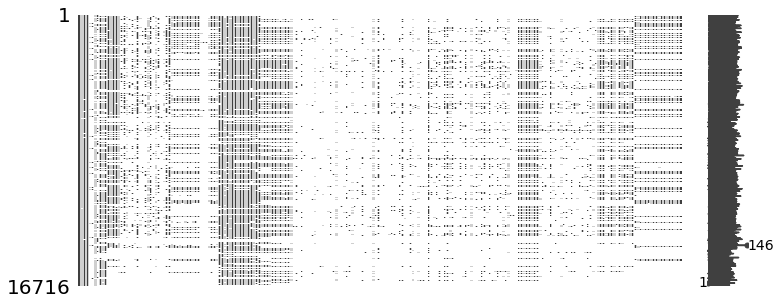

In [10]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN이 컬럼마다 많아 아래 그래프만으로는 인사이트를 얻기 어렵다.

import missingno as msno

msno.matrix(mcq, figsize=(12,5))

- 16716명의 데이터와 228개의 선다형 객관식 문항과 62개의 주관식 문항에 대한 응답이다. (총 290개의 질문)
- 응답하지 않은 문항이 많다.

# 통계

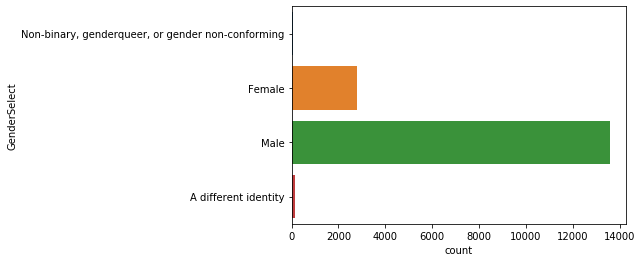

In [11]:
# 성별(GenderSelect)
sns.countplot(y='GenderSelect', data=mcq)

여성보다는 남성의 응답이 훨씬 많다

In [12]:
# 국가별 응답 수(Country)
country_df = pd.DataFrame(mcq.Country.value_counts())
# print(country_df)

# country 컬럼을 인덱스로 지정해 주고
country_df['국가'] = country_df.index

# 컬럼의 순서대로 응답 수, 국가를 지정
country_df.columns = ['응답 수', '국가']

# index 컬럼을 삭제하고 순위를 알기 위해 reset_index() 해준다.
country_df = country_df.reset_index().drop('index', axis=1)
country_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [13]:
# 연령(Age)에 대한 정보
mcq.Age.describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

Text(0.5, 1.02, 'Dist. of Age')

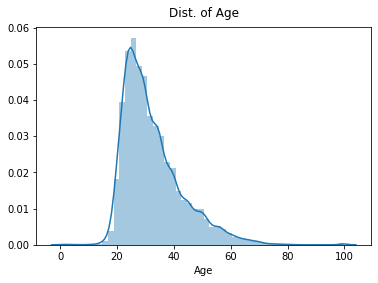

In [14]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])  
plt.title('Dist. of Age', y=1.02)

- 응답자의 대부분이 어리다. 20대부터 급격히 늘어나고 30대가 가장 많다. 평균 나이는 32살이다.

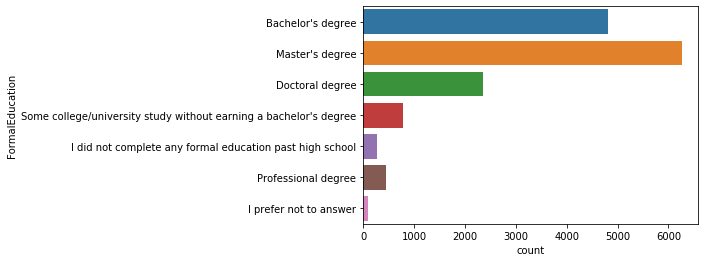

In [15]:
# 학력(FormalEducation)
sns.countplot(y='FormalEducation', data=mcq)

학사 학위를 가진 사람보다 석사 학위를 가지고 있는 사람이 많으며, 박사학위를 가지고 있는 사람도 많다.

In [16]:
# 전공(MajorSelect)
# value_counts()를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다.
# normalize=True 옵션을 사용하면, 해당 데이터가 전체 데이터에서 차지하는 비율을 반환
mcq_major_counts = pd.DataFrame(mcq.MajorSelect.value_counts())
mcq_major_pct = pd.DataFrame(mcq.MajorSelect.value_counts(normalize=True))
mcq_major_df = mcq_major_counts.merge(
                    mcq_major_pct, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


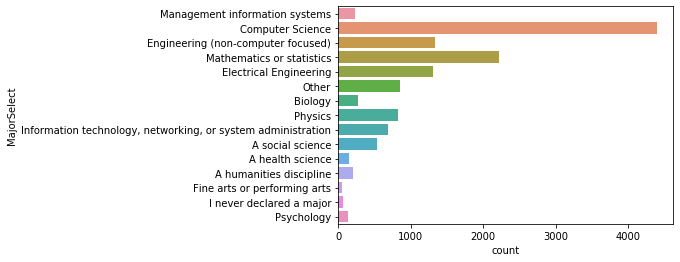

In [17]:
sns.countplot(y='MajorSelect', data=mcq)

- 컴퓨터 전공자들이 33%로 가장 많으며 그 뒤로 수학/통계, 엔지니어링 순이다.

In [18]:
# 취업 여부(EmploymentStatus)
mcq_es_counts = pd.DataFrame(mcq.EmploymentStatus.value_counts())
mcq_es_pct = pd.DataFrame(mcq.EmploymentStatus.value_counts(normalize=True))
mcq_es_df = pd.merge(mcq_es_counts, mcq_es_pct, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


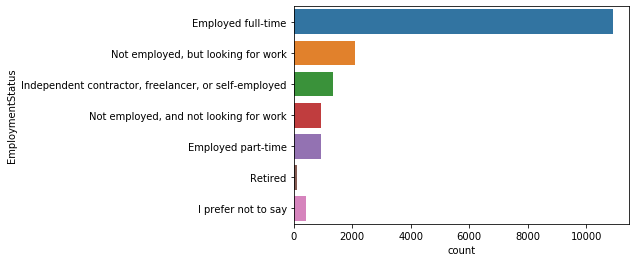

In [19]:
sns.countplot(y='EmploymentStatus', data=mcq)

- 풀타임으로 일하고 있는 사람이 65%로 대부분이며, 일하지 않고 구직 중인 사람, 프리랜서 순이다.

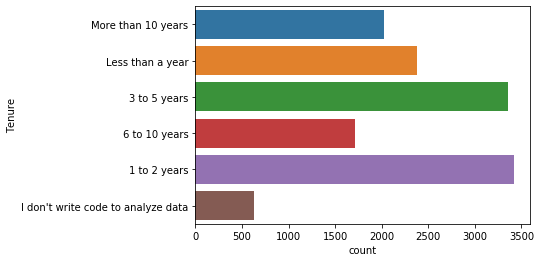

In [20]:
# 프로그래밍 경험(Tenure)
sns.countplot(y='Tenure', data=mcq)

- 대부분이 5년 미만이며, 특히 1~2년의 경험을 가진 사람들이 많다.

### Korea

The number of interviewees in Korea: 194


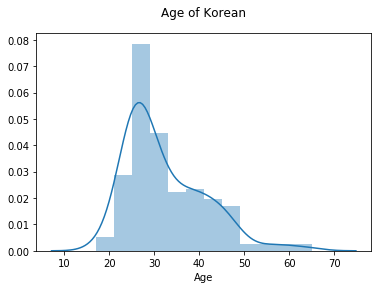

In [21]:
# korea = mcq[mcq['Country'] == 'South Korea']
korea = mcq.loc[(mcq['Country'] == 'South Korea')]

print('The number of interviewees in Korea: {}'.format(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Age of Korean', y=1.05)
plt.show()

Text(0.5, 1.05, 'Gender of Korean')

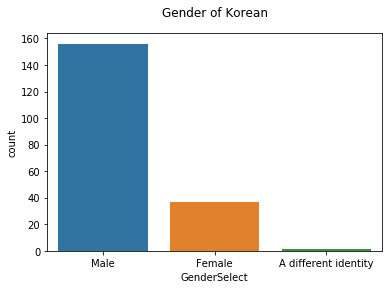

In [22]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Gender of Korean', y=1.05)

Text(0.5, 1.02, 'Korean Male dist')

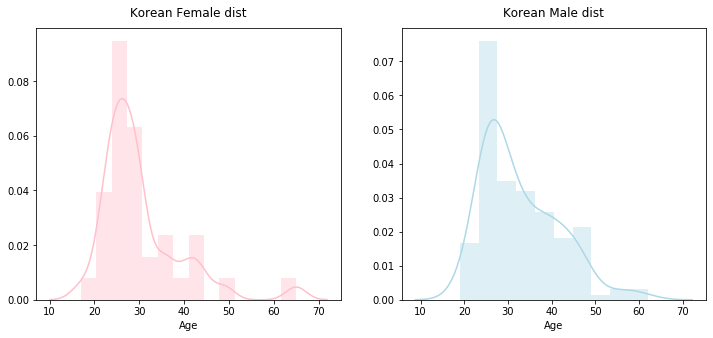

In [23]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.distplot(korea[korea['GenderSelect']=='Female']['Age'].dropna(), ax=ax[0],
            color='pink')
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), ax=ax[1],
            color='lightblue')
ax[0].set_title('Korean Female dist', y=1.02)
ax[1].set_title('Korean Male dist', y=1.02)

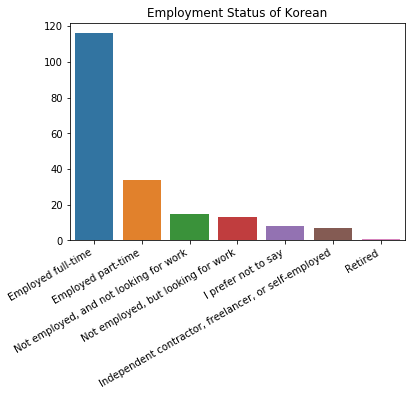

In [24]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts())
plt.xticks(rotation=30, ha='right')
plt.title('Employment Status of Korean')
plt.ylabel('')
plt.show()

# 자주 묻는 질문 FAQ

## Q1. Python과 R 중 어떤 언어를 배우는 것이 좋을까?  
sol) mcq의 'LanguageRecommendationSelect' 컬럼을 이용해서 시각화해보자.

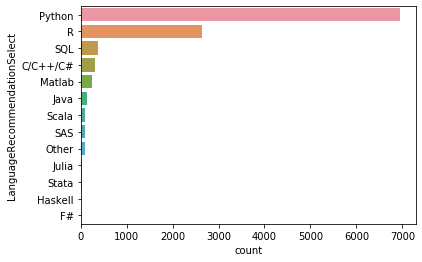

In [25]:
sns.countplot(y=mcq.LanguageRecommendationSelect, order=mcq.LanguageRecommendationSelect.value_counts().index)

In [26]:
print('추천하는 언어')
for i in range(mcq['LanguageRecommendationSelect'].nunique()):
    print('언어의 종류: {:<10}\t {:.2f}%'.format(mcq['LanguageRecommendationSelect'].value_counts().index[i],
                                             mcq['LanguageRecommendationSelect'].value_counts(normalize=True)[i]*100))
    


추천하는 언어
언어의 종류: Python    	 63.11%
언어의 종류: R         	 24.03%
언어의 종류: SQL       	 3.50%
언어의 종류: C/C++/C#  	 2.79%
언어의 종류: Matlab    	 2.16%
언어의 종류: Java      	 1.25%
언어의 종류: Scala     	 0.85%
언어의 종류: SAS       	 0.80%
언어의 종류: Other     	 0.77%
언어의 종류: Julia     	 0.27%
언어의 종류: Stata     	 0.25%
언어의 종류: Haskell   	 0.15%
언어의 종류: F#        	 0.04%


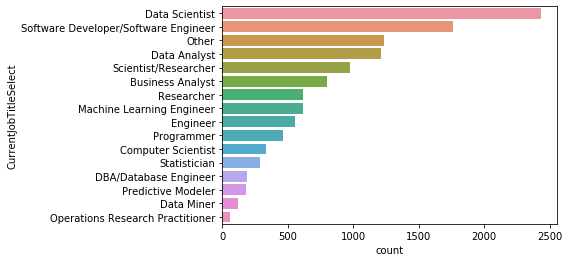

In [27]:
# 현재 하고 있는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'], order=mcq['CurrentJobTitleSelect'].value_counts().index)

- 데이터 사이언스, 소프트웨어 개발자/엔지니어, 데이터 분석가 등의 순서다.
- 상위 10개 직업의 R과 Python 선호 정도를 시각화 해보자.

(7158, 228)


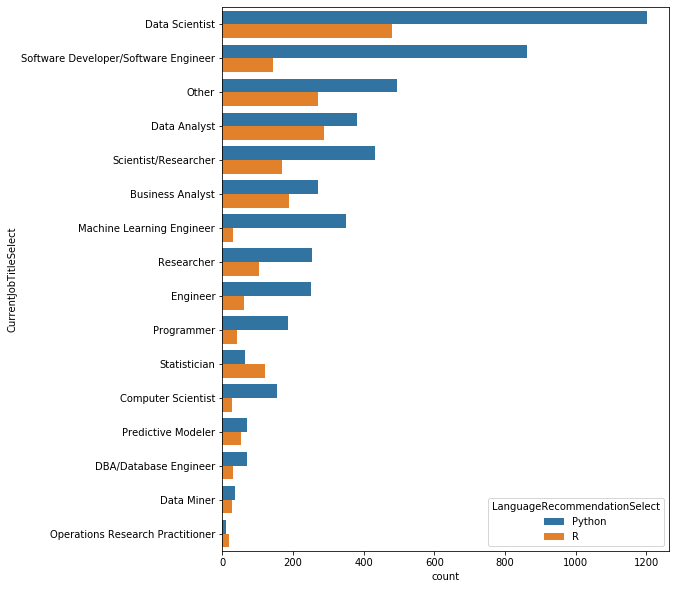

In [28]:
plt.figure(figsize=(8,10))
df = mcq[mcq['CurrentJobTitleSelect'].notnull() & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | 
    (mcq['LanguageRecommendationSelect'] == 'R'))]

print(df.shape)

sns.countplot(y=df['CurrentJobTitleSelect'], hue=df['LanguageRecommendationSelect'],
             order = df['CurrentJobTitleSelect'].value_counts().index)

- 대부분의 직업군에서 R보다 Python을 선호하는 경향이다.
- 주목할 점은 통계학자(Statistician)와 Operations Research Practitioner는 Python보다 R을 선호하는 경향이 보인다.

## Q2. DataScience를 얼마나 배웠을까?  
  
sol) mcq의 LearningDataScienceTime 변수를 활용하자.

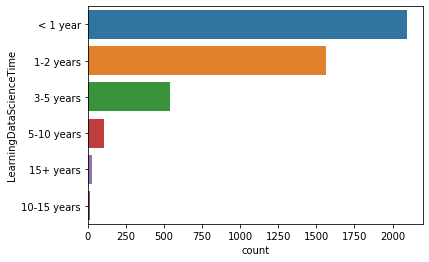

In [29]:
sns.countplot(y=mcq.LearningDataScienceTime,order=mcq.LearningDataScienceTime.value_counts().index)

- 대부분 5년 이하의 시간을 쓴 것으로 보인다.

## Q3. 데이터 사이언스 분야에서 앞으로 크게 주목받을 분야는?

In [30]:
mltool = pd.DataFrame(mcq.MLToolNextYearSelect.value_counts()[:15])
mltool_pct = pd.DataFrame(mcq.MLToolNextYearSelect.value_counts(normalize=True)[:15])

mcq_ml_tool_df = mltool.merge(mltool_pct, right_index=True, left_index=True)
mcq_ml_tool_df.columns = ['count', 'percent']
mcq_ml_tool_df

,count,percent
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


Text(0.5, 1.02, 'Which ML Tool Will be Selected?')

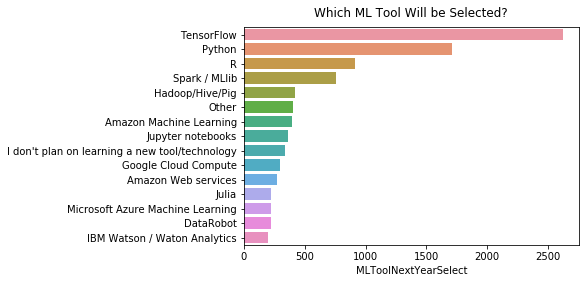

In [31]:
sns.barplot(x = mcq_ml_tool_df['count'], y=mcq_ml_tool_df.index)
plt.xlabel('MLToolNextYearSelect')
plt.title('Which ML Tool Will be Selected?', y=1.02)

## 어떤 데이터 사이언스 방법이 주목받을까?  
  
sol) MLMethodNextYearSelect 열을 활용하자.

In [32]:
ml_method = pd.DataFrame(mcq['MLMethodNextYearSelect'].value_counts()[:15])
ml_method_pct = pd.DataFrame(mcq['MLMethodNextYearSelect'].value_counts(normalize=True)[:15])

ml_method_df = ml_method.merge(ml_method_pct, left_index=True, right_index=True)
ml_method_df.columns = ['count', 'percent']
ml_method_df

,count,percent
Deep learning,4362,0.402659
Neural Nets,1386,0.127942
Time Series Analysis,680,0.062771
Bayesian Methods,511,0.047171
Text Mining,493,0.045509
Genetic & Evolutionary Algorithms,425,0.039232
Social Network Analysis,364,0.033601
Anomaly Detection,307,0.028339
"Ensemble Methods (e.g. boosting, bagging)",269,0.024832
Other,258,0.023816


Text(0.5, 1.02, 'Which Method Will Be Selected?')

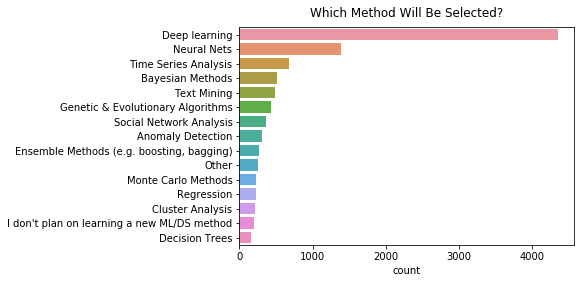

In [33]:
sns.barplot(x=ml_method_df['count'], y=ml_method_df.index)
plt.title('Which Method Will Be Selected?', y=1.02)

# Q4. 어디서 데이터 사이언스를 배우는 게 좋을까?

In [34]:
mcq['LearningPlatformSelect'] = mcq.LearningPlatformSelect.astype('str').apply(lambda x: x.split(','))

In [35]:
mcq_platform = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)

In [36]:
mcq_platform.name = 'Platform'

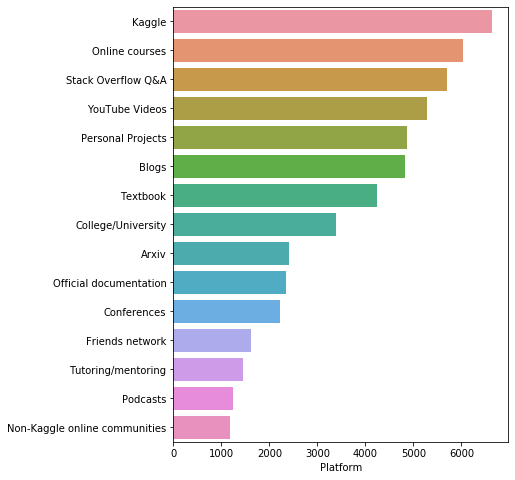

In [37]:
plt.figure(figsize=(6,8))
data = mcq_platform[mcq_platform != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

- Kaggle이 가장 인기 있는 플랫폼이지만, Kaggle에서 조사한 결과이기에 편향될 가능성 농후
- 그외 온라인 코스, 스택 오버플로우, 유투브, 개인 프로젝트 등의 순위이며 대학 교육이 생각보다 낮은 순위

In [38]:
# 누구에게 물어본 것인지 찾아보자.
question.loc[question['Column'].str.contains('LearningCategory')]

,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [39]:
# 학습 플랫폼과 유용성에 대한 연관성을 살펴보자.
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]

In [40]:
use_features

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

In [41]:
fdf = {}
for features in use_features:
    a = mcq[features].value_counts()
    a = a/a.sum()            # list형태로 반환
    fdf[features[len('LearningPlatformUsefulness'):]] = a  # Dictionary의 key : value

In [42]:
fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)
fdf.head()

,Not Useful,Somewhat useful,Very useful
Projects,0.008135,0.247184,0.744681
Courses,0.007844,0.292056,0.700100
SO,0.011348,0.362411,0.626241
Kaggle,0.008507,0.372323,0.619171
Tutoring,0.022440,0.399018,0.578541


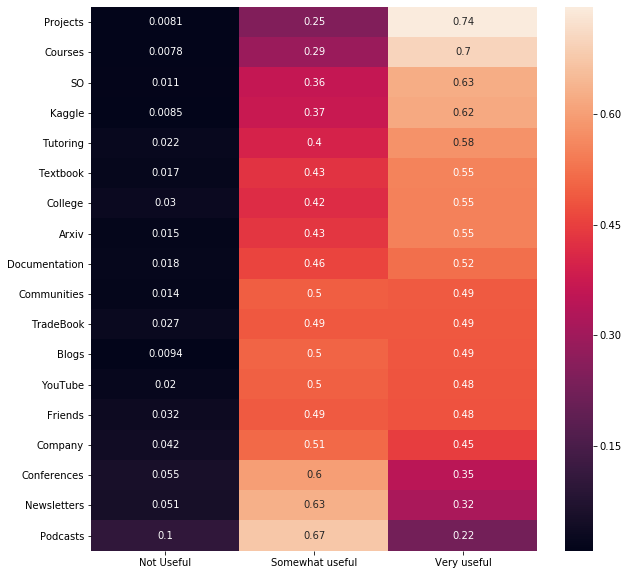

In [43]:
# 학습 플랫폼이 얼마나 유용한지 관계를 살펴보자.
plt.figure(figsize=(10,10))
sns.heatmap(fdf, annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

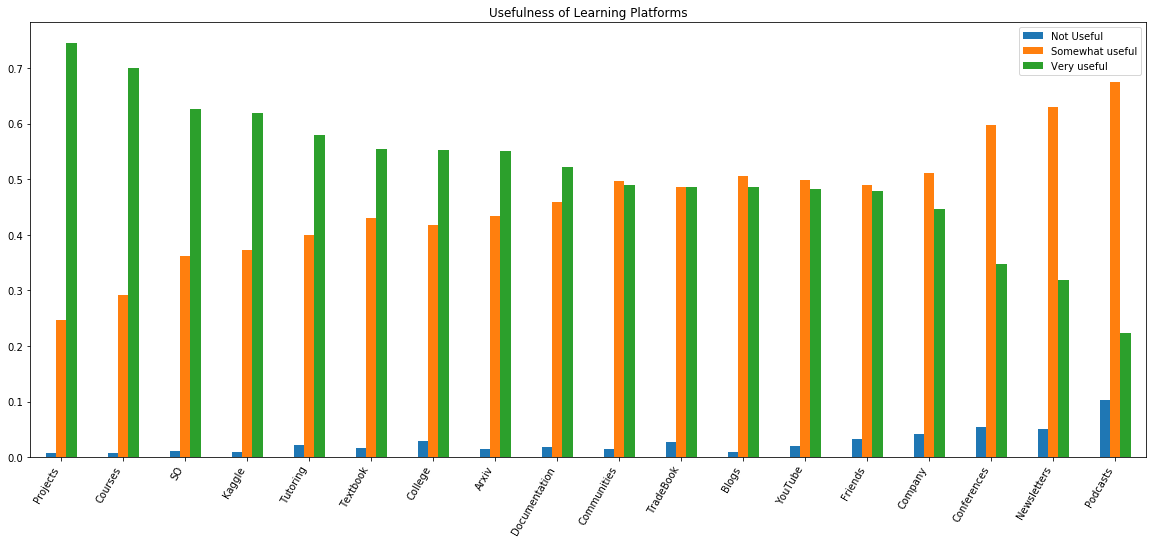

In [44]:
# 유용함의 정도를 각 플랫폼 별로 그룹화해서 보자.
fdf.plot(kind='bar', figsize=(20,8), title='Usefulness of Learning Platforms')
plt.xticks(rotation=60, ha='right')

In [45]:
# 공부에 도움이 된 비율(LearningCategory + **)을 바탕으로 평균의 파이차트를 그려보자.
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [46]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

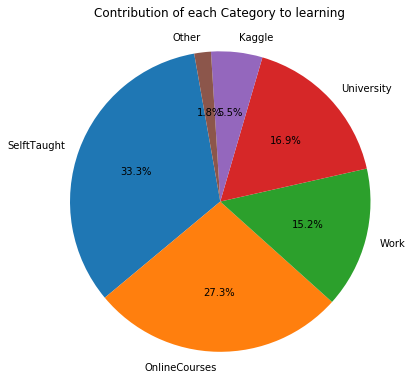

In [47]:
# 파이 차트를 그린다.
plt.figure(figsize=(6,6))
plt.pie(cdf, labels=cdf.index, startangle=100,
       autopct='%1.1f%%')
plt.axis('equal')
plt.title('Contribution of each Category to learning', y=1.05)
plt.show()

- 독학(개인 프로젝트)을 하거나, 온라인 코스를 통해 공부를 하는 사람이 많음을 볼 수 있다. 예상외로 대학에서 공부하는 사람이 적다.

# Q5. 하드웨어 사양은 어떤 걸 쓸까?

In [77]:
question[question['Column']=='HardwarePersonalProjectsSelect']

,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [82]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [85]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].head(10)

2                                Basic laptop (Macbook)
7     Basic laptop (Macbook),Gaming Laptop (Laptop +...
10    Laptop or Workstation and local IT supported s...
12       Basic laptop (Macbook),Traditional Workstation
18                               Basic laptop (Macbook)
19    Gaming Laptop (Laptop + CUDA capable GPU),Trad...
20                               Basic laptop (Macbook)
29                          GPU accelerated Workstation
35    Laptop or Workstation and local IT supported s...
36            Gaming Laptop (Laptop + CUDA capable GPU)
Name: HardwarePersonalProjectsSelect, dtype: object

- comma(',')로 구분되어 있으니 이를 기준으로 나누고 정리하자.

In [91]:
mcq['HardwarePersonalProjectsSelect'] = mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))

In [112]:
hardware = mcq.apply(lambda x: 
                pd.Series(x['HardwarePersonalProjectsSelect']), axis=1).stack().reset_index(level=1, drop=True)

In [116]:
hardware.name = 'Hardware'
pd.DataFrame(hardware.value_counts())

,Hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


- 맥북을 사용하는 응답자가 가장 많으며, 그 뒤로 랩탑과 함께 클라우드 서비스를 이용하거나, 게이밍 랩탑을 사용하는 사람이 많다.

# Q6. 일주일에 얼마나 DS 공부하는 데 시간을 쓸까?

In [118]:
question[question['Column'] == 'TimeSpentStudying']

,Column,Question,Asked
76,TimeSpentStudying,"On average, how many hours a week do you spend...",Learners


In [120]:
mcq['TimeSpentStudying'].value_counts()

2 - 10 hours     2323
11 - 39 hours     793
0 - 1 hour        739
40+               173
Name: TimeSpentStudying, dtype: int64

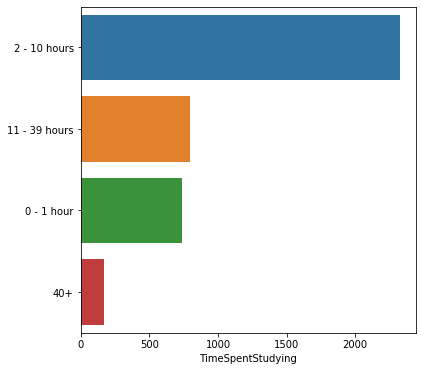

In [136]:
plt.figure(figsize=(6,6))
sns.barplot(x=mcq['TimeSpentStudying'].value_counts(), y=mcq['TimeSpentStudying'].value_counts().index)

- 보통 주당 2~10시간을 공부하는 사람이 많으며 40시간 이상 공부에 매진하는 사람도 있다. 그럼 이 직업별로 공부시간도 시각화해보자.

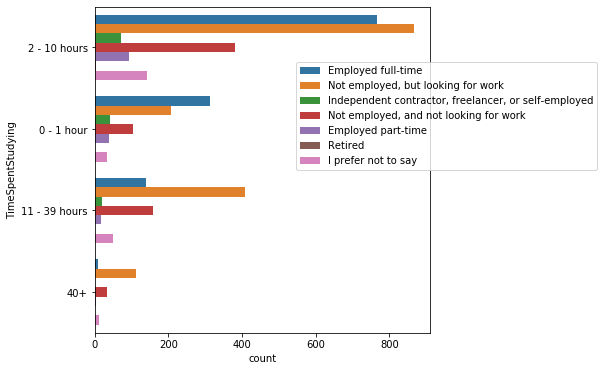

In [132]:
plt.figure(figsize=(6,6))
sns.countplot(y=mcq['TimeSpentStudying'],
           hue=mcq['EmploymentStatus'])
plt.legend(loc=(0.6,0.5))

- 10시간 이하는 풀타임 고용자의 비율이 높으며 11시간 이상은 직업이 없는 사람들의 비율이 높다. 
- 그럼 풀타임 고용자(Employed full-time)와 직업을 가지지 않은 사람들(Not employed, but looking for work, Not employed, and not looking for work)로 나눠서 공부시간을 보자

In [148]:
# mcq[mcq['EmploymentStatus']=='Employed full-time']
full_time = mcq.loc[mcq['EmploymentStatus']=='Employed full-time']
not_employed = mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work') | (mcq['EmploymentStatus']=='Not employed, and not looking for work') ]

Text(0.5, 1.0, 'Time Spent Studying: not employed')

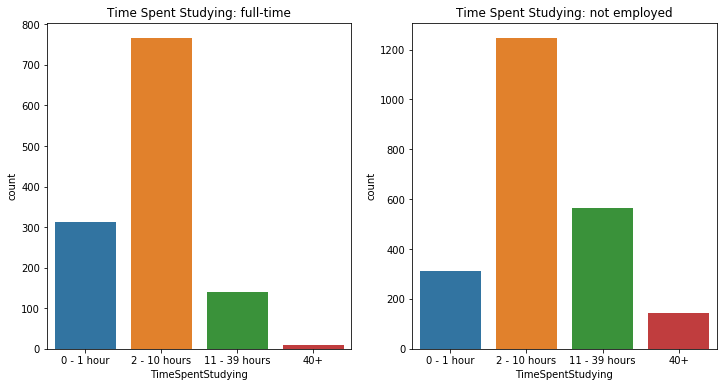

In [166]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x='TimeSpentStudying', data=full_time, ax=ax[0])
sns.countplot(x='TimeSpentStudying', data=not_employed, ax=ax[1],
             order=['0 - 1 hour', '2 - 10 hours', '11 - 39 hours', '40+'])
ax[0].set_title('Time Spent Studying: full-time')
ax[1].set_title('Time Spent Studying: not employed')